# Problem Statement

Sinking of Titanic is one of the most popular shipwrecks in history. After the incident, the world got to know about all the passengers’ details and whether they survived or not. In the Kaggle competition, they generated a similar situation where all the necessary information about the passengers are given with their survival status in training data set. From that, we will have built a machine learning model which will be able to predict survival status of passengers from the test data set where all the necessary information of the passengers are given except the survival status. We will build several models for this task and will consider the model with best matching output.

For this type of classification task, we have to follow some steps to reach our goal.
1. We have to collect and incorporate training and test data
2. We have to analyze and explore the data and then find patterns and correlation between features
3. We have to cleanse and prepare the data. We can try several methods like converting the Text values to integer, filing up the missing values, grouping range of values, eliminate irrelevant features, create convenient new features
4. We have to Build models, train the models and then test the models.
5. After that we will compare the prediction accuracy of all the models to find the best suiting model for the classification problem.



# Importing libraries and Data sets
First, we will start by importing necessary libaries and incorporating training and test data sets. The Data sets were acquired from Kaggle's competition site.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import random as rnd
import tensorflow as tf

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from keras import callbacks
from tensorflow.keras.layers import Dense, Dropout, Input


Using TensorFlow backend.


In [4]:
#import full dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Analyzing Data
We will analyze and explore the train and test data to find patterns and correlation between features. This will also help while pre processing the data.

First, we will preview both data sets.

In [5]:
#data analyzing
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that there are 12 features and among them Name, Sex, Ticket, Cabin, Embarked are non numerical value.

Now, we will see if our training and test data sets have any missing value.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In train data, there are some missing value in Age (177), Cabin (687) and Embarked (2) features.

In test data, there are some missing value in Age (86), Fare (1) and Cabin (327) features.

We will dive into analyzing the data more.

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


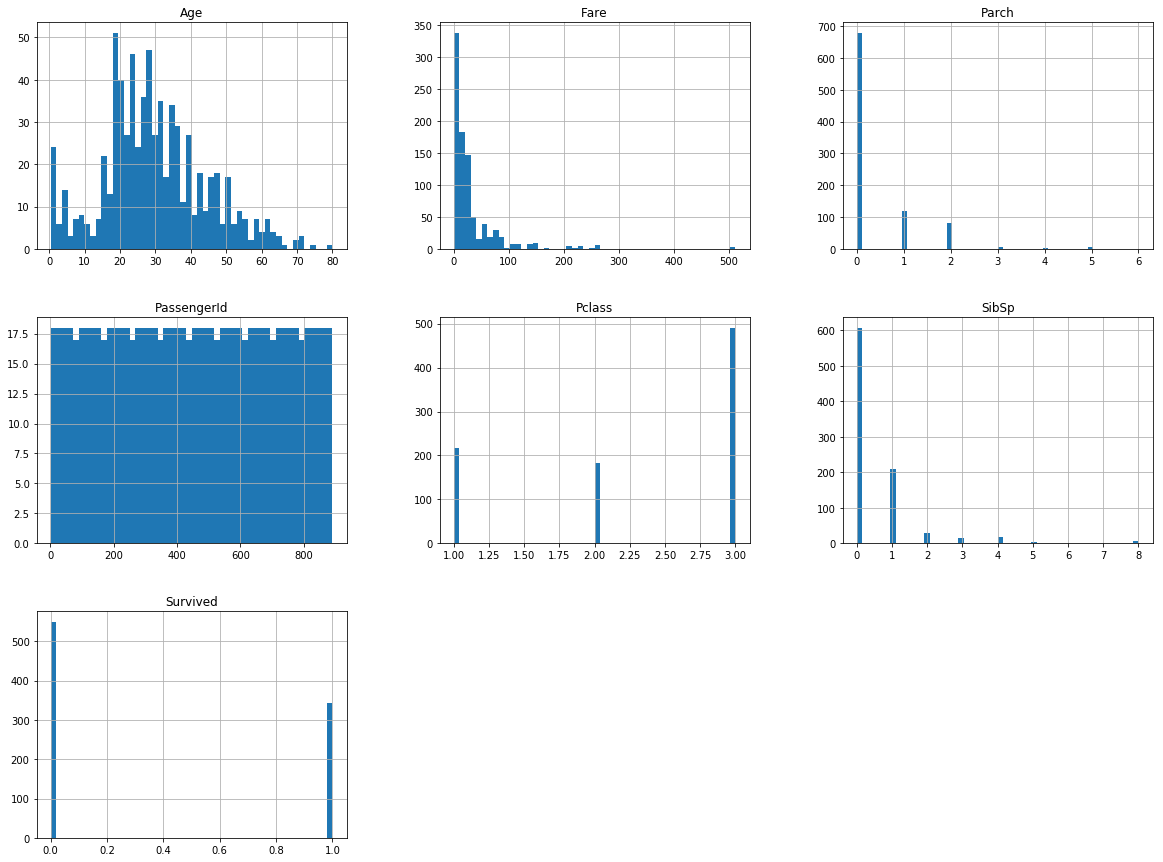

In [10]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gill, Mr. John William",male,1601,B96 B98,S
freq,1,577,7,4,644


We can see from the previous analyzation that-
1. 75% passengers didn't travel with parents or children.
2. Number of elder people were less. 
3. There were only few high fares paid passengers; most of them were low fare paid passengers. 
4. Most of the passengers didn't have any siblings or spouse. 
5. Number of 3rd class passengers were higher.
6. 65% passengers were male.
7. for 72% people, port of Embarkation was S = Southampton
8. Every passenger had unique name
9. Ticket and Cabin have good amount of duplicate values
10. Most passengers are in 15-35 age range

Now, we will start finding correlation between features.


In [12]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [15]:
train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


In [16]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can observe that-
1. Sex female have high survival rate
2. Pclass=1 passengers have have higher survival rate

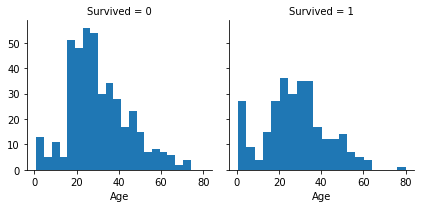

In [17]:
np.warnings.filterwarnings('ignore')
age = sns.FacetGrid(train_data, col='Survived')
age.map(plt.hist, 'Age', bins=20)

We can see that all the elder(near 80) passengers survived. Also, a large number passengers near 15-30 age didn't survive.

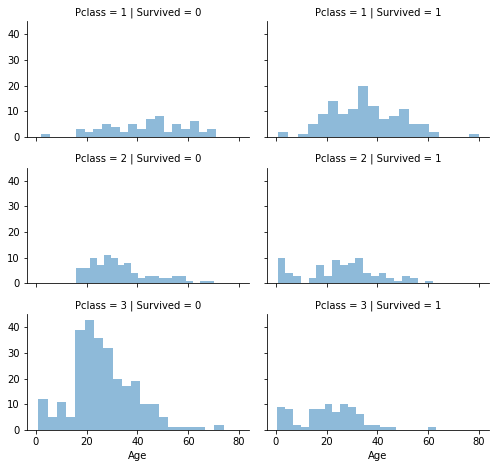

In [18]:
pclass = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
pclass.map(plt.hist, 'Age', alpha=.5, bins=20)



We can see that-
1. large number of passengers from Pclass=1 survived.
2. Large number of passengers from Pclass=3 didn't survived.



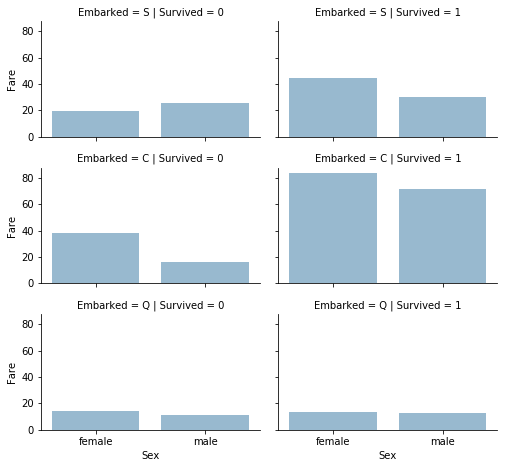

In [19]:
embark = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
embark.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order= None)
embark.add_legend()

We can observe that in most cases high fare paid passengers survived.

# Data pre-processing 

Now, we will start preparing the data.

We have observed that 'Ticket' and 'Cabin' features have data duplicacy and there are losts of missing data in 'Cabin'.

Also, 'PassengerId' is unique for all and doesn't contibute in corelation. Therefore, we will drop 'Ticket','PassengerId' and 'Cabin' features from train data and drop 'Ticket' and 'Cabin' features from test data.

In [20]:
#dropping ticket, cabin and passengerId features
train_data = train_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis=1)

We will convert the values of 'Sex' feature to numerical value where 'female' will be appointed as '0' and 'male' will be appointed as '1'. we will perform this action for both train and test data.

In [21]:
#converting text values of 'Sex' to integer for train data
train_data['Sex'].replace('female', 0 ,inplace=True)
train_data['Sex'].replace('male', 1,inplace=True)

In [22]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [23]:
#converting text values of 'Sex' to integer for test data
test_data['Sex'].replace('female', 0 ,inplace=True)
test_data['Sex'].replace('male', 1,inplace=True)

In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


We will fill up some missing values in train and test dtata.

for the 'Age' feature, we will use Median function to fill up the missing value in train and test data.

for the 'Fare' feature, we will use Median to fill up the missing value in test data.

for the 'Embarked' feature, we will use Mode to fill up the missing value in train data.

In [25]:
#filling up missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

Now we will check to see if there is any missing value left.

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


We can notice that there are no missing value found in train or test data sets anymore.



'SibSp' feature represents number of sibling/spouse of each passanger who were present on the ship and 'Parch' feature represents number of parents/children of each passenger who were present on the ship. If we merge this 2 feature and create a new feature called 'FamilySize' where we will get the number of people from the passenger's family who were present on that ship including the passenger himself/herself. We will perform this for both train data and test data. For avoiding redundency, we will merge train and test data into 'all_data'.

In [28]:
#merge train and test data
all_data=[train_data,test_data]
#create a new feature named FamilySize
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Based on 'FamilySize', we will also introduce another feature called 'IsAlone' which will represent if a passenger was alone or not. We will create this in all_data(train and test).

In [29]:
#create a new feature named IsAlone
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We can see that passengers who were alone had higher survival rate.

As we have created 'FamilySize' merging 'SibSp' and 'Parch', we can drop this two feature from train and test data.

In [30]:
#dropping SibSp and Parch features
train_data = train_data.drop(['SibSp','Parch'], axis=1)
test_data = test_data.drop(['SibSp','Parch'], axis=1)

train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1,1


As we have seen that all the passengers have unique name. We will try to seperate (using regular expression) their name titles and analyze to see if it has any correlation between titles and survival.

In [31]:
#extracting titles from Name using regular expression
all_data=[train_data,test_data]
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


We can see that some titles have correlation with survival like passengers with title 'Miss' and 'Mrs' had higher survival rate and passengers with title 'Mr' had lower survival rate.


We will try to categorize this title into numerical values by grouping them. 

We will categorize 'Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' titles as 'Rare' since they are mostly unique.


Also, some of the title's meaning are same like 'Mlle', 'Miss' and 'Ms' or 'Mme' and 'Mrs'. Therefore, they will also fall into same category. 

After that, we will define "Mr" as 1, "Miss" as 2, "Mrs" as 3, "Master" as 4 and "Rare" as 5 in a new feature in Train and test data sets named 'Title'.


In [32]:
#categorizing titles according to similarity
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [33]:
#creating a new feature and map title in numerical value
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2,0,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2,0,3
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1,1,1


As we have found correlation between 'title' and 'Survived' features with the help of 'Name' feature and 'Name' feature alone doesn't have any corelation with 'Survived', we will drop this feature.

In [34]:
#dropping Name feature
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,22.0,7.2500,S,2,0,1
1,1,1,0,38.0,71.2833,C,2,0,3
2,1,3,0,26.0,7.9250,S,1,1,2
3,1,1,0,35.0,53.1000,S,2,0,3
4,0,3,1,35.0,8.0500,S,1,1,1


We will convert the values of 'Embarked' to interger value. 'S' will be assigned as '0', 'C' will be assigned as '1' and 'Q' will be assigned as '2'

In [35]:
#converting text values of 'Embarked' to integer for train and test data
all_data=[train_data,test_data]
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,22.0,7.2500,0,2,0,1
1,1,1,0,38.0,71.2833,1,2,0,3
2,1,3,0,26.0,7.9250,0,1,1,2
3,1,1,0,35.0,53.1000,0,2,0,3
4,0,3,1,35.0,8.0500,0,1,1,1


As Age feature contains continous value, we will convert certain ranges of value into different groups for test and train data.

Age below 16 and age 16 will be considered as '0'.

16<Age<=32 will be considered as '1'.

32<Age<=48 will be considered as '2'.

48<Age<=64 will be considered as '3'.

and age>64 will be considered as '4'.



In [36]:
#Categorize Age into groups
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 48), 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
    


As Fare feature contains continous value, we will convert certain ranges of value into different groups for test and train data.

Fare below 8 and age 8 will be considered as '0'.

8<Fare<=15 will be considered as '1'.

15<Fare<=31 will be considered as '2'.

and Fare>31 will be considered as '3'.

In [37]:
#Categorize Fare into groups
for dataset in all_data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [38]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,2,0,1
1,1,1,0,2,3,1,2,0,3
2,1,3,0,1,0,0,1,1,2
3,1,1,0,2,3,0,2,0,3
4,0,3,1,2,1,0,1,1,1


# Model and predict

As we have finished our data pre-processing, now we will move forward to building Machine learning models for predicting output.

First, we need to Split Train data to create X_train, X_test, Y_train and Y_test, where we will use X_train and Y_train to train the models and X_test and Y_test to evaluate the performance of the models.


In [39]:
#splitting train and test set
X = train_data.drop("Survived", axis=1)
Y = train_data["Survived"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((623, 8), (268, 8), (623,), (268,))

There are a good number of machine learning models present now a days. But not all of them work good on all kinds of data sets. Each of the model works best on specific kind of data set. Considering our problem and given data sets, ours fall into classification problem. For these type of classification problem and data sets Naive bayes classifier, Perceptron classifier, Decision tree classifier and Neural networks will perform well and give good prediction result.

We will try to build these 4 models and train them with X_train and Y_train. And after that, we will evaluate their performace using X_test and Y_test data.


# Naive bayes classifier


Accuracy of Naive Bayes model is :  78.73


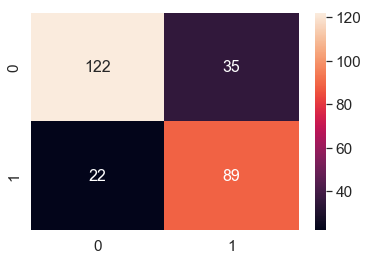

In [40]:
#Naive bayes classifier
gaussian = GaussianNB()

#train the model
gaussian.fit(X_train, Y_train)

#evaluate the model
Y_pred_NaiveBayes = gaussian.predict(X_test)

#evaluation matrix
nb_cm = confusion_matrix(Y_test, Y_pred_NaiveBayes)
acc_gaussian = round(accuracy_score(Y_pred_NaiveBayes,Y_test)*100,2)
print('Accuracy of Naive Bayes model is : ',acc_gaussian)

sns.set(font_scale=1.4) # for label size
sns.heatmap(nb_cm, annot=True,fmt='g', annot_kws={"size": 16}) # font size
plt.show()

# Perceptron Classifier

Accuracy of Perceptron model is :  46.64


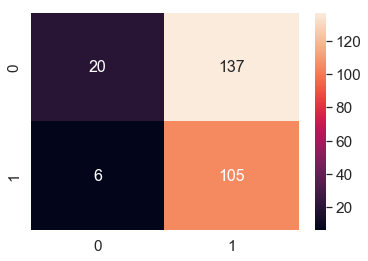

In [51]:
# Perceptron

model = Perceptron()

#train the model
model.fit(X_train,Y_train)

#evaluate the model
Y_pred_Perceptron=model.predict(X_test)

#evaluation matrix
p_cm = confusion_matrix(Y_test, Y_pred_Perceptron)

acc_Perceptron = round(accuracy_score(Y_pred_Perceptron,Y_test)*100,2)
print('Accuracy of Perceptron model is : ',acc_Perceptron)

sns.set(font_scale=1.4) # for label size
sns.heatmap(p_cm, annot=True, fmt='g', annot_kws={"size": 16}) # font size
plt.show()

# Decision tree classifier

Accuracy of Decision tree model is :  77.61


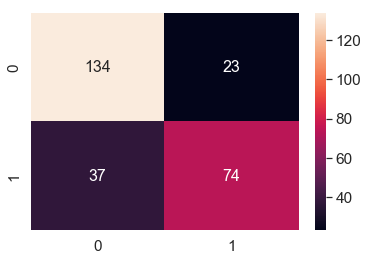

In [42]:
#Decision tree classifier
decision_tree = DecisionTreeClassifier()

#train the model
decision_tree.fit(X_train, Y_train)

#evaluate the model
Y_pred_DecisionTree = decision_tree.predict(X_test)

#evaluation matrix
dt_cm = confusion_matrix(Y_test, Y_pred_DecisionTree)

acc_decision_tree = round(accuracy_score(Y_pred_DecisionTree,Y_test)*100,2)
print('Accuracy of Decision tree model is : ',acc_decision_tree)

sns.set(font_scale=1.4) # for label size
sns.heatmap(dt_cm, annot=True, fmt='g', annot_kws={"size": 16}) # font size
plt.show()

# Neural Networks

We created simple 3-layer Neural networks with ReLU activation in each layer and an output dense layer.

As optimizer, we used Adam and for loss function, we have used binary_crossentropy.

To stop training data from overfitting we have also used early stopping for better model. We trained our model with batch size of 32, verbose 2 and in 200 epoch.

In [43]:
# Neural Networks

L1=20
L2=20
L3=5
model = tf.keras.Sequential()

# Adding the first NN layer
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train.shape[1],),kernel_regularizer='l2', activation='relu'))
# Adding the second NN layer
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
# Adding the third NN layer
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
#  Adding the output layer
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))

# Compiling the NN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)


In [44]:
#train the model
model.fit(X_train, Y_train,batch_size = 32, verbose = 2, epochs = 200,callbacks =[earlystopping])

Epoch 1/200
 - 0s - loss: 1.0466 - acc: 0.6067
Epoch 2/200
 - 0s - loss: 0.9690 - acc: 0.6292
Epoch 3/200
 - 0s - loss: 0.9120 - acc: 0.6292
Epoch 4/200
 - 0s - loss: 0.8649 - acc: 0.6292
Epoch 5/200
 - 0s - loss: 0.8270 - acc: 0.6292
Epoch 6/200
 - 0s - loss: 0.7955 - acc: 0.6292
Epoch 7/200
 - 0s - loss: 0.7669 - acc: 0.6581
Epoch 8/200
 - 0s - loss: 0.7440 - acc: 0.7560
Epoch 9/200
 - 0s - loss: 0.7225 - acc: 0.7721
Epoch 10/200
 - 0s - loss: 0.7036 - acc: 0.7881
Epoch 11/200
 - 0s - loss: 0.6875 - acc: 0.7881
Epoch 12/200
 - 0s - loss: 0.6730 - acc: 0.7849
Epoch 13/200
 - 0s - loss: 0.6607 - acc: 0.7929
Epoch 14/200
 - 0s - loss: 0.6494 - acc: 0.7881
Epoch 15/200
 - 0s - loss: 0.6390 - acc: 0.7945
Epoch 16/200
 - 0s - loss: 0.6303 - acc: 0.7978
Epoch 17/200
 - 0s - loss: 0.6233 - acc: 0.7961
Epoch 18/200
 - 0s - loss: 0.6143 - acc: 0.8010
Epoch 19/200
 - 0s - loss: 0.6091 - acc: 0.8026
Epoch 20/200
 - 0s - loss: 0.6030 - acc: 0.8074
Epoch 21/200
 - 0s - loss: 0.5983 - acc: 0.8010
E

Accuracy of of Neural Networks is :  80.6 %


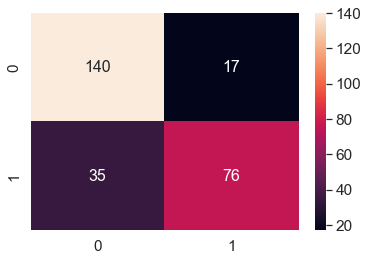

In [45]:
#evaluate the model
Y_pred_NN = model.predict(X_test)

#scaling the output data
scaler = StandardScaler()
Y_pred_NN = scaler.fit_transform(Y_pred_NN)
Y_pred_NN = (Y_pred_NN > 0.5)

#Evaluation matrix
ann_cm = confusion_matrix(Y_test, Y_pred_NN)
acc_NN = round(accuracy_score(Y_pred_NN,Y_test) * 100, 2)

print('Accuracy of of Neural Networks is : ',acc_NN,'%')

sns.set(font_scale=1.4) # for label size
sns.heatmap(ann_cm, annot=True, fmt='g', annot_kws={"size": 16}) # font size
plt.show()

# Evaluation

We have implemented all of the four models and now we will compare their accuracy. From that, we will choose the model with best accuracy to acquire our desired output.

In [46]:
#Comparison
models = pd.DataFrame({
    'Model': ['Naive Bayes', 
              'Decision Tree',
             'Neural Networks',
             'Perceptron'],
    'Score': [acc_gaussian.mean(),acc_decision_tree.mean(), acc_NN.mean(), acc_Perceptron.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Neural Networks,80.60
0,Naive Bayes,78.73
1,Decision Tree,77.61
3,Perceptron,46.64


We can see that neural network model has given the best accuracy. 

Now we will again train Neural network model with train_data as this time we will not be spliting it and so it will have more data while training which will increase it's performance. And then, we will use the model to predict output for test_data.

In [47]:
#dataset for training and test
train_X = train_data.drop("Survived", axis=1)
train_Y=train_data["Survived"]
test_X  = test_data.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

X_train_ = train_X.values
Y_train_ = train_Y.values

X_test_ = test_X.values
X_test_ = X_test_.astype(np.float64, copy=False)

In [48]:
#Neural networks
L1=20
L2=20
L3=5
model = tf.keras.Sequential()

# Adding the first NN layer
model.add(tf.keras.layers.Dense(L1,input_shape=(X_train_.shape[1],),kernel_regularizer='l2', activation='relu'))
# Adding the second NN layer
model.add(tf.keras.layers.Dense(L2,kernel_regularizer='l2', activation='relu'))
# Adding the third NN layer
model.add(tf.keras.layers.Dense(L3,kernel_regularizer='l2', activation='relu'))
#  Adding the output layer
model.add(tf.keras.layers.Dense(1,kernel_regularizer='l2', activation='sigmoid'))

# Compiling the NN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

#train the model
model.fit(X_train_, Y_train_, batch_size = 32, verbose = 2, epochs = 200, callbacks =[earlystopping])

#predict output
Y_pred_NN_ = model.predict(X_test_)


Epoch 1/200
 - 0s - loss: 1.0337 - acc: 0.6465
Epoch 2/200
 - 0s - loss: 0.9270 - acc: 0.7228
Epoch 3/200
 - 0s - loss: 0.8487 - acc: 0.7856
Epoch 4/200
 - 0s - loss: 0.7864 - acc: 0.7688
Epoch 5/200
 - 0s - loss: 0.7403 - acc: 0.7969
Epoch 6/200
 - 0s - loss: 0.7053 - acc: 0.7969
Epoch 7/200
 - 0s - loss: 0.6771 - acc: 0.7991
Epoch 8/200
 - 0s - loss: 0.6568 - acc: 0.8025
Epoch 9/200
 - 0s - loss: 0.6372 - acc: 0.8047
Epoch 10/200
 - 0s - loss: 0.6230 - acc: 0.8159
Epoch 11/200
 - 0s - loss: 0.6120 - acc: 0.8081
Epoch 12/200
 - 0s - loss: 0.6005 - acc: 0.8171
Epoch 13/200
 - 0s - loss: 0.5899 - acc: 0.8159
Epoch 14/200
 - 0s - loss: 0.5831 - acc: 0.8193
Epoch 15/200
 - 0s - loss: 0.5773 - acc: 0.8103
Epoch 16/200
 - 0s - loss: 0.5714 - acc: 0.8137
Epoch 17/200
 - 0s - loss: 0.5650 - acc: 0.8215
Epoch 18/200
 - 0s - loss: 0.5615 - acc: 0.8171
Epoch 19/200
 - 0s - loss: 0.5572 - acc: 0.8171
Epoch 20/200
 - 0s - loss: 0.5591 - acc: 0.8092
Epoch 21/200
 - 0s - loss: 0.5514 - acc: 0.8137
E

# Submission file

We have generated our desired output as Y_pred_NN_. 

Based on the evaluated output, we will prepare the submission data for kaggle competetion and then save it as csv file.

In [51]:
result_data = test_data.copy()

#Scale output data
scaler = StandardScaler()
Y_pred_NN_ = scaler.fit_transform(Y_pred_NN_)

Y_pred_NN_ = (Y_pred_NN_ > 0.5)

#generate submission data
result_data['Survived'] = Y_pred_NN_.astype(int)

#convert to csv
result_data.to_csv('submission.csv', columns=['PassengerId', 'Survived'], index=False)